In [34]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

from math import e, log, ceil, inf
import numpy as np
from numba import jit
from time import time

# Q4

In [36]:
delta = e ** (-5)
eps = e * 1e-4
p = 123457
numHashes = ceil(log(1 / delta))
numBuckets = ceil(e / eps)

In [37]:
def hash_function(a, b, x, p = 123457, n_Buckets = numBuckets):
    return ((a * (x % p) + b) % p) % n_Buckets

In [38]:
hash_params = []

with open('hash_params.txt') as f:
    for line in f:
        p1, p2 = line.split()
        hash_params.append((int(p1), int(p2)))

In [41]:
c = np.zeros((numHashes, numBuckets), dtype=int)

In [42]:
with open('words_stream.txt') as f:
    #t = 0
    for idx, wordID in enumerate(f):
        for j in range(numHashes):
            h = hash_function(hash_params[j][0], hash_params[j][1], int(wordID))
            c[j, h] += 1
t = idx

In [43]:
realCounts = {}
with open('counts.txt') as f:
    for line in f:
        wordID, count = line.split()
        realCounts[int(wordID)] = int(count)

In [44]:
hashCounts = {}
for wordID in realCounts:
    hashCount = inf
    for j in range(numHashes):
        h = h = hash_function(hash_params[j][0], hash_params[j][1], int(wordID))
        cjh = c[j, h]
        if cjh < hashCount:
          hashCount = cjh
    hashCounts[wordID] = hashCount

In [45]:
error = []
exact = []
for wordID, realCount in realCounts.items():
    hashCount = hashCounts[wordID]
    error.append((hashCount - realCount) / realCount)
    exact.append(realCount / t)

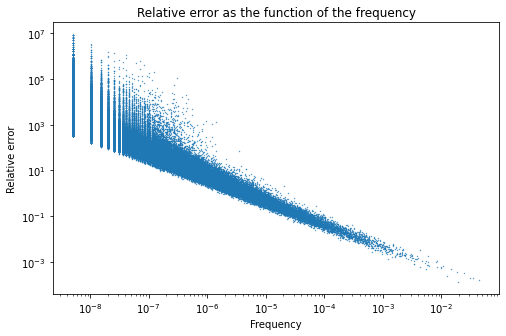

In [53]:
plt.figure(figsize = (8, 5))
plt.loglog(exact, error, '.', markersize=0.7)

plt.xlabel('Frequency')
plt.ylabel('Relative error')
plt.title('Relative error as the function of the frequency')
plt.savefig('4b.png')
plt.show()